In [49]:
import pandas as pd

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from sklearn import metrics,preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, ShuffleSplit
from sklearn.metrics import make_scorer,r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./input/autotel_with_target_groupedby.csv",index_col=0)

In [3]:
df.head()

,neighborhood,Date,Hour,Area,Population,Year,Month,Day,day_name,Temprature,...,Wind Direction,hour_sin_time,hour_cos_time,month_sin_time,month_cos_time,day_sin_time,day_cos_time,day_name_sin_time,day_name_cos_time,count
0,'נאות אפקה א,2017-10-23,9.0,353611.36,3035.0,2017.0,10.0,23.0,2,25.25,...,276.17,7.071068e-01,-0.707107,-0.866025,0.5,-0.998717,-0.050649,-0.998717,-0.050649,5.0
1,'נאות אפקה א,2017-10-23,12.0,353611.36,3035.0,2017.0,10.0,23.0,2,25.65,...,302.17,1.224647e-16,-1.000000,-0.866025,0.5,-0.998717,-0.050649,-0.998717,-0.050649,27.0
2,'נאות אפקה א,2017-10-23,22.0,353611.36,3035.0,2017.0,10.0,23.0,2,22.92,...,127.17,-5.000000e-01,0.866025,-0.866025,0.5,-0.998717,-0.050649,-0.998717,-0.050649,12.0
3,'נאות אפקה א,2017-10-24,7.0,353611.36,3035.0,2017.0,10.0,24.0,3,20.83,...,119.67,9.659258e-01,-0.258819,-0.866025,0.5,-0.988468,0.151428,-0.988468,0.151428,1.0
4,'נאות אפקה א,2017-10-24,15.0,353611.36,3035.0,2017.0,10.0,24.0,3,25.03,...,294.17,-7.071068e-01,-0.707107,-0.866025,0.5,-0.988468,0.151428,-0.988468,0.151428,4.0


In [4]:
drops = ['Date','Hour','Year','Month','Day','day_name','count']
y = df['count']
X = df.drop(drops, 1)

In [5]:
neighborhood_dummies = pd.get_dummies(X['neighborhood'])
X = X.drop('neighborhood', 1)
pd.concat([X, neighborhood_dummies], axis=1)

,Area,Population,Temprature,Relative Humidity,Amount of Rain,Wind Speed,Wind Direction,hour_sin_time,hour_cos_time,month_sin_time,...,קרית שאול,קרית שלום,רביבים,רמת החייל,רמת הטייסים,רמת-אביב,שפירא,תל ברוך,תל ברוך צפון,תל-חיים
0,353611.36,3035.0,25.25,53.33,0.0,1.72,276.17,7.071068e-01,-0.707107,-0.866025,...,0,0,0,0,0,0,0,0,0,0
1,353611.36,3035.0,25.65,58.67,0.0,4.25,302.17,1.224647e-16,-1.000000,-0.866025,...,0,0,0,0,0,0,0,0,0,0
2,353611.36,3035.0,22.92,62.33,0.0,1.37,127.17,-5.000000e-01,0.866025,-0.866025,...,0,0,0,0,0,0,0,0,0,0
3,353611.36,3035.0,20.83,69.50,0.0,2.58,119.67,9.659258e-01,-0.258819,-0.866025,...,0,0,0,0,0,0,0,0,0,0
4,353611.36,3035.0,25.03,58.17,0.0,4.07,294.17,-7.071068e-01,-0.707107,-0.866025,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51071,370393.43,4483.0,22.15,90.33,0.0,5.45,354.67,-8.660254e-01,-0.500000,0.866025,...,0,0,0,0,0,0,0,0,0,1
51072,370393.43,4483.0,21.50,95.00,0.0,3.80,354.50,-8.660254e-01,0.500000,0.866025,...,0,0,0,0,0,0,0,0,0,1
51073,370393.43,4483.0,21.30,88.17,0.0,0.93,38.83,-5.000000e-01,0.866025,0.866025,...,0,0,0,0,0,0,0,0,0,1
51074,370393.43,4483.0,24.63,76.33,0.0,3.43,9.67,-9.659258e-01,0.258819,0.866025,...,0,0,0,0,0,0,0,0,0,1


In [6]:
normalize = ['Area','Population','Temprature','Relative Humidity','Amount of Rain','Wind Speed','Wind Direction']
X[normalize] = preprocessing.normalize(X[normalize])
X

,Area,Population,Temprature,Relative Humidity,Amount of Rain,Wind Speed,Wind Direction,hour_sin_time,hour_cos_time,month_sin_time,month_cos_time,day_sin_time,day_cos_time,day_name_sin_time,day_name_cos_time
0,0.999963,0.008583,0.000071,0.000151,0.0,0.000005,0.000781,7.071068e-01,-0.707107,-0.866025,0.5,-0.998717,-0.050649,-0.998717,-0.050649
1,0.999963,0.008583,0.000073,0.000166,0.0,0.000012,0.000854,1.224647e-16,-1.000000,-0.866025,0.5,-0.998717,-0.050649,-0.998717,-0.050649
2,0.999963,0.008583,0.000065,0.000176,0.0,0.000004,0.000360,-5.000000e-01,0.866025,-0.866025,0.5,-0.998717,-0.050649,-0.998717,-0.050649
3,0.999963,0.008583,0.000059,0.000197,0.0,0.000007,0.000338,9.659258e-01,-0.258819,-0.866025,0.5,-0.988468,0.151428,-0.988468,0.151428
4,0.999963,0.008583,0.000071,0.000164,0.0,0.000012,0.000832,-7.071068e-01,-0.707107,-0.866025,0.5,-0.988468,0.151428,-0.988468,0.151428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51071,0.999926,0.012102,0.000060,0.000244,0.0,0.000015,0.000957,-8.660254e-01,-0.500000,0.866025,-0.5,-0.394356,0.918958,-0.394356,0.918958
51072,0.999926,0.012102,0.000058,0.000256,0.0,0.000010,0.000957,-8.660254e-01,0.500000,0.866025,-0.5,-0.394356,0.918958,-0.394356,0.918958
51073,0.999927,0.012102,0.000058,0.000238,0.0,0.000003,0.000105,-5.000000e-01,0.866025,0.866025,-0.5,-0.394356,0.918958,-0.394356,0.918958
51074,0.999927,0.012102,0.000066,0.000206,0.0,0.000009,0.000026,-9.659258e-01,0.258819,0.866025,-0.5,-0.201299,0.979530,-0.201299,0.979530


In [7]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
# Create cross-validation sets from the training data
cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

In [51]:
def plotScatterPred(y_test,y_pred):
    actual_values = y_test
    plt.scatter(y_pred, actual_values, alpha=.7,
                color='b') #alpha helps to show overlapping data
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Linear Regression Model')
    plt.show()

## <u> Regression Metrices </u>

### <u> Mean Absolute Error </u>
- Average of the difference between the Original Values and the Predicted Values.
- Do not gives any idea of the direction of the error i.e. whether we are under predicting the data or over predicting the data.
- Smaller the MAE, better is the model.
- Robust to outliers
- Range (0, + infinity]

$$ Mean\ Absolute\ Error = \frac{1}{N} \sum_{i=1}^{N} |y_{i} -  \hat{y_{i}}|$$


### <u>Mean Squared Error </u>

- Takes the average of the square of the difference between the original values and the predicted values.
- As we take square of the error, the effect of larger errors(sometimes outliers) become more pronounced then smaller error. Model will be penalized more for making predictions that differ greatly from the corresponding actual value.
- Before applying MSE, we must eliminate all nulls/infinites from the input.
- Not robust to outliers
- Range (0, + infinity]

$$ Mean\ Squared\ Error = \frac{1}{N} \sum_{i=1}^{N} (y_{i} -  \hat{y_{i}})^2$$

#### MAE vs. MSE
- Being more complex and biased towards higher deviation, RMSE is still the default metric of many models because loss function defined in terms of RMSE is smoothly differentiable whereas Mean Absolute Error requires complicated linear programming to compute the gradient.
- If we want a metric just to compare between two models from interpretation point of view, then MAE may be a better choice.
- Units of both RMSE & MAE are same as y values which is not true for R Square.
- Minimizing the squared error (𝐿2) over a set of numbers results in finding its mean, and minimizing the absolute error (𝐿1) results in finding its median.

### <u>RMSE</u>

- Because the MSE is squared, its units do not match that of the original output. RMSE is the square root of MSE.
- Since the MSE and RMSE both square the residual, they are similarly affected by outliers.
- The RMSE is analogous to the standard deviation and is a measure of how large the residuals are spread out.
- - Generally, RMSE will be higher than or equal to MAE.

$$ Root\ Mean\ Squared\ Error =\sqrt{ \frac{1}{N} \sum_{i=1}^{N} (y_{i} -  \hat{y_{i}})^2}$$

### <u> Root Mean Squared Logarithmic Error </u>
- We take the log of the predictions and actual values.
- What changes are the variance that we are measuring.
- RMSLE is usually used when we don’t want to penalize huge differences in the predicted and the actual values when both predicted and actual values are huge numbers.
- If both predicted and actual values are small: RMSE and RMSLE are same.
- If either predicted or the actual value is big: RMSE > RMSLE
- If both predicted and actual values are big: RMSE > RMSLE (RMSLE becomes almost negligible)

$$ Root\ Mean\ Squared\ Log\ Error =\sqrt{ \frac{1}{N} \sum_{i=1}^{N} (\log (y_{i} + 1) -  (\log \hat{y_{i}} + 1))^2}$$ 

### <u> R_squared </u>

In the case of a classification problem, if the model has an accuracy of 0.8, we could gauge how good our model is against a random model, which has an accuracy of  0.5. So the random model can be treated as a benchmark. But when we talk about the RMSE metrics, we do not have a benchmark to compare.

This is where we can use R-Squared metric. The formula for R-Squared is as follows:

$$R^2 = 1 - \frac{MSE(model)}{MSE(baseline)} = 1 - \frac{\sum_{i=1}^{N}(y_1 - \hat{y_1})^2}{\sum_{i=1}^{N}(\bar{y_1} - \hat{y_1})^2}$$

MSE(model): Mean Squared Error of the predictions against the actual values

MSE(baseline): Mean Squared Error of  mean prediction against the actual values

In other words how good our regression model as compared to a very simple model that just predicts the mean value of target from the train set as predictions.
- A model performing equal to baseline would give R-Squared as 0. Better the model, higher the r2 value.
- Range[- infinity, 1)

In [33]:
L_R_model = LinearRegression()

# fit model
L_R_model.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = L_R_model.predict(X_test)

In [34]:
def calc_regression_metrics(y_test, y_pred_class):
    # calculate Mean Absolute Error
    print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred_class)}')

    # calculate Mean Squared Error
    print(f'MSE: {metrics.mean_squared_error(y_test, y_pred_class)}')

    # calculate Root Mean Squared Error
    from math import sqrt
    print(f'RMSE: {sqrt(metrics.mean_squared_error(y_test, y_pred_class))}')

    # calculate Mean Squared Log Error
    print(f'RMSLE: {metrics.mean_squared_log_error(y_test, y_pred_class)}')

    # calculate R2 score
    print(f'R^2: {metrics.r2_score(y_test, y_pred_class)}')

In [35]:
calc_regression_metrics(y_test, y_pred_class)

MAE: 9.744863304619521
MSE: 229.1285581173236
RMSE: 15.136993034196838
RMSLE: 1.1251429307952103
R^2: 0.027704996134311544


In [12]:
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [52]:
D_T_R_model = DecisionTreeRegressor()

# Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

# Transform 'performance_metric' into a scoring function using 'make_scorer' 
scoring_fnc = make_scorer(performance_metric)

# Create the grid search cv object --> GridSearchCV()
# Make sure to include the right parameters in the object:
# (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
grid = GridSearchCV(estimator=D_T_R_model, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

# Fit the grid search object to the data to compute the optimal model
grid = grid.fit(X_train, y_train)

best = grid.best_estimator_

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(best.get_params()['max_depth']))

Parameter 'max_depth' is 5 for the optimal model.


In [53]:
# make class predictions for the testing set
y_pred = best.predict(X_test)

performance_metric(y_test,y_pred)

0.06434618876658349

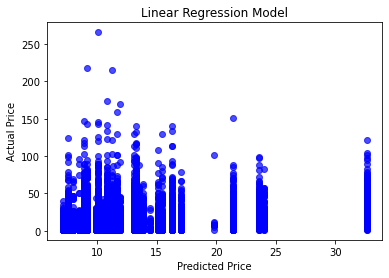

In [54]:
plotScatterPred(y_test,y_pred)

In [18]:
# Test options and evaluation metric using Root Mean Square error method
num_folds = 2
seed = 7
RMS = 'neg_mean_squared_error'
# Transform 'performance_metric' into a scoring function using 'make_scorer' 
scoring_fnc = make_scorer(performance_metric)

In [19]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [25]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring_fnc)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.026034 (0.000108)
LASSO: 0.009267 (0.000174)
EN: 0.009998 (0.000016)
KNN: -0.161941 (0.000323)
CART: -0.994045 (0.012483)
SVR: -0.096389 (0.002968)


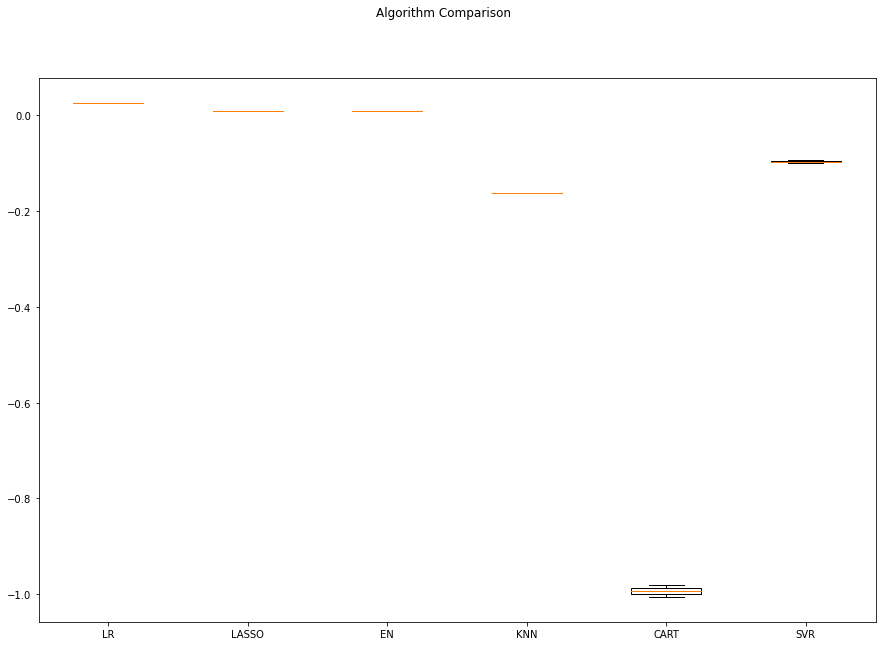

In [29]:
fig = pyplot.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(15, 10, 8), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15, 10, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [46]:
y_pred = mlp.predict(X_test)

In [47]:
performance_metric(y_test,y_pred)

-0.34621052171109823

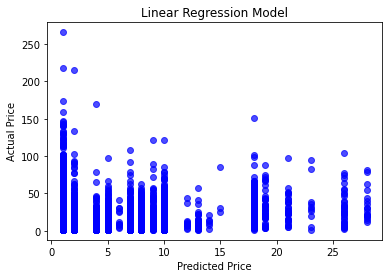